# Healthcare Lab (Stage 2
)

**Learning Objectives:**
  * Practice basic data visualization with Seaborn
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to medical events.
### 2. Each medical event is uniquely identified by `MedicalClaim`.
### 3. A given medical event might involve several medical procedures.
### 4. Each medical procedure is uniquely identified by `ClaimItem`
### 5. A given medical procedure is characterized by `PrincipalDiagnosisDesc`,`PrincipalDiagnosis`,`RevenueCodeDesc`, `RevenueCode`, `TypeFlag` and `TotalExpenses`

### 6. Each medical procedure involves: `MemberName`,`MemberID`,`County`,`HospitalName`, `HospitalType`, `StartDate`,`EndDate`


## 1. Library Import

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [3]:
HealthCareDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/HealthcareDataset_PublicRelease.csv",sep=',',parse_dates=['StartDate','EndDate','BirthDate'])

In [4]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


In [5]:
HealthCareDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52563 entries, 0 to 52562
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      52563 non-null  int64         
 1   MemberName              52563 non-null  object        
 2   MemberID                52563 non-null  object        
 3   County                  52563 non-null  object        
 4   MedicalClaim            52563 non-null  object        
 5   ClaimItem               52563 non-null  int64         
 6   HospitalName            52563 non-null  object        
 7   HospitalType            52563 non-null  object        
 8   StartDate               52563 non-null  datetime64[ns]
 9   EndDate                 52563 non-null  datetime64[ns]
 10  PrincipalDiagnosisDesc  52563 non-null  object        
 11  PrincipalDiagnosis      52563 non-null  object        
 12  RevenueCodeDesc         52561 non-null  object

## 3. Visualization of Continous Variables (LinePlots)

In [6]:
HealthCareDataSet.head(10)[['StartDate','TotalExpenses']]

,StartDate,TotalExpenses
0,2020-01-08,15.148
1,2020-01-08,3.073
2,2020-01-08,123.900
3,2020-01-08,7.511
4,2020-01-08,8.631
5,2020-01-08,263.200
6,2020-01-08,44.100
7,2020-01-08,364.000
8,2020-01-08,789.600
9,2020-01-08,478.100


### Let's try to observe the evolution of TotalExpenses accross time

<Axes: xlabel='StartDate', ylabel='TotalExpenses'>

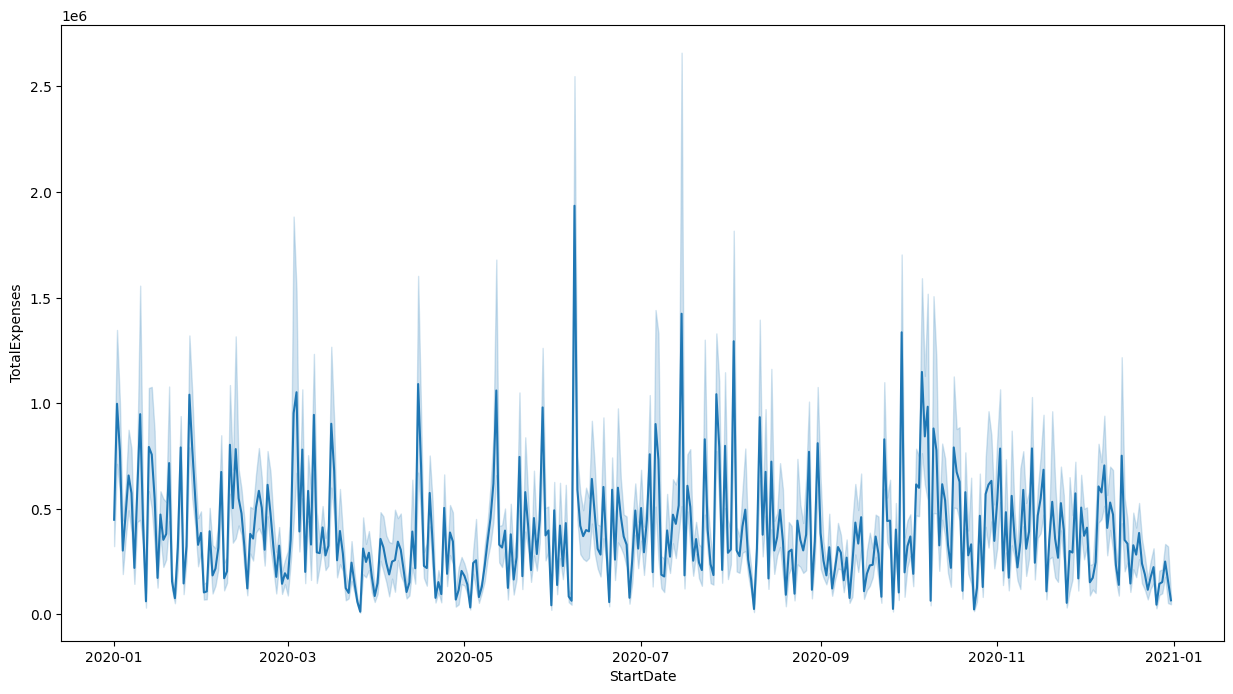

In [7]:
plt.figure(figsize=(15,8))
sns.lineplot(data=HealthCareDataSet, x="StartDate", y="TotalExpenses",estimator='sum')

### Let's try to observe the evolution of TotalExpenses accross time and Counties

<Axes: xlabel='StartDate', ylabel='TotalExpenses'>

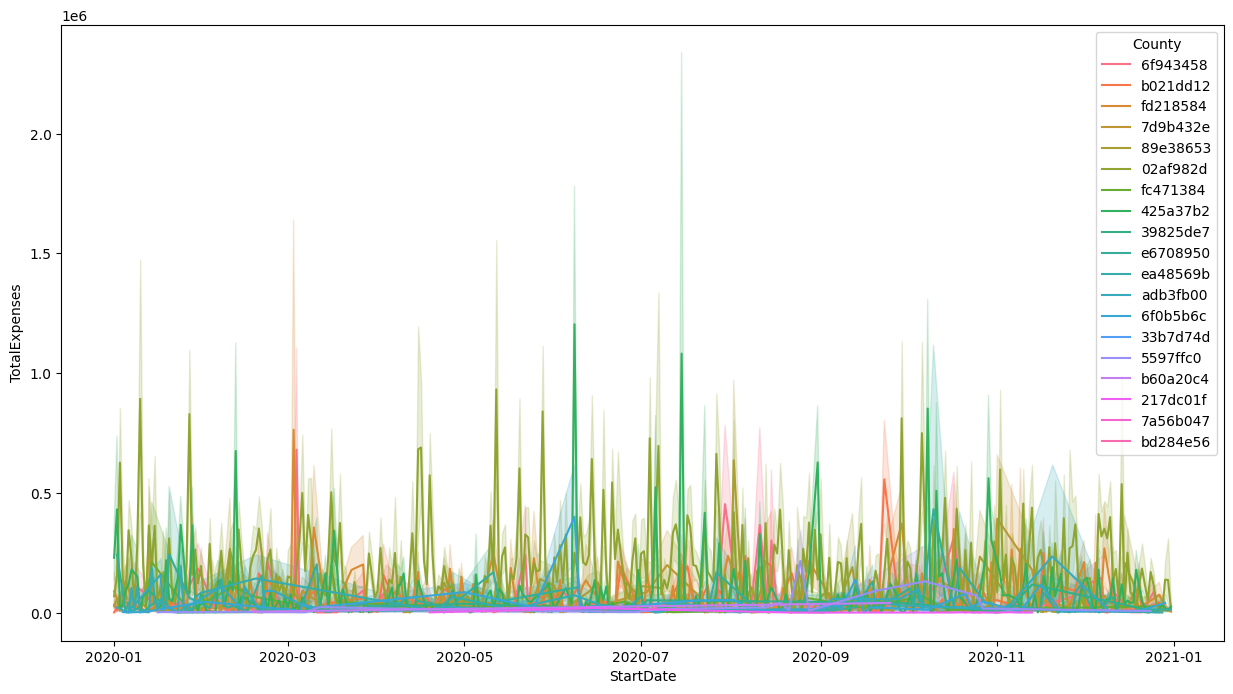

In [8]:
plt.figure(figsize=(15,8))
sns.lineplot(data=HealthCareDataSet, x="StartDate", y="TotalExpenses",estimator='sum',hue='County')

## 4. Visualization of continuous variables (Histograms)

In [9]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


### What is the TotalExpenses distribution?

<Axes: xlabel='TotalExpenses', ylabel='Count'>

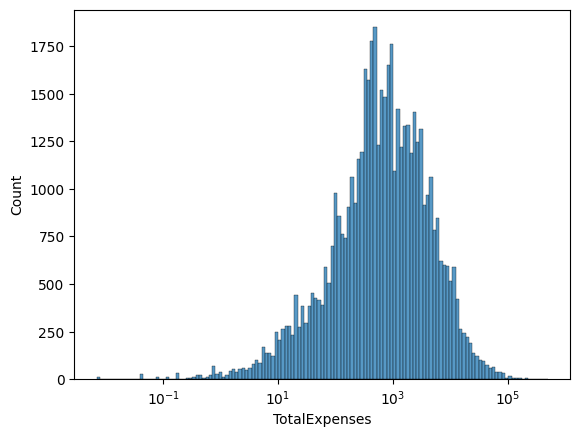

In [10]:
sns.histplot(data=HealthCareDataSet, x="TotalExpenses",log_scale=True)

### What is the distribution of the duration of medical events ?

In [11]:
## We compute the duration of each medical event
HealthCareDataSet['Duration']=HealthCareDataSet['EndDate']-HealthCareDataSet['StartDate']

In [12]:
# We compute the days
HealthCareDataSet['DurationDays']=HealthCareDataSet['Duration'].dt.days

In [13]:
HealthCareDataSet['DurationDays'].sort_values()

0          0
44410      0
44353      0
44349      0
44339      0
        ... 
31858    129
31857    129
31856    129
31869    129
32019    129
Name: DurationDays, Length: 52563, dtype: int64

<Axes: xlabel='DurationDays', ylabel='Count'>

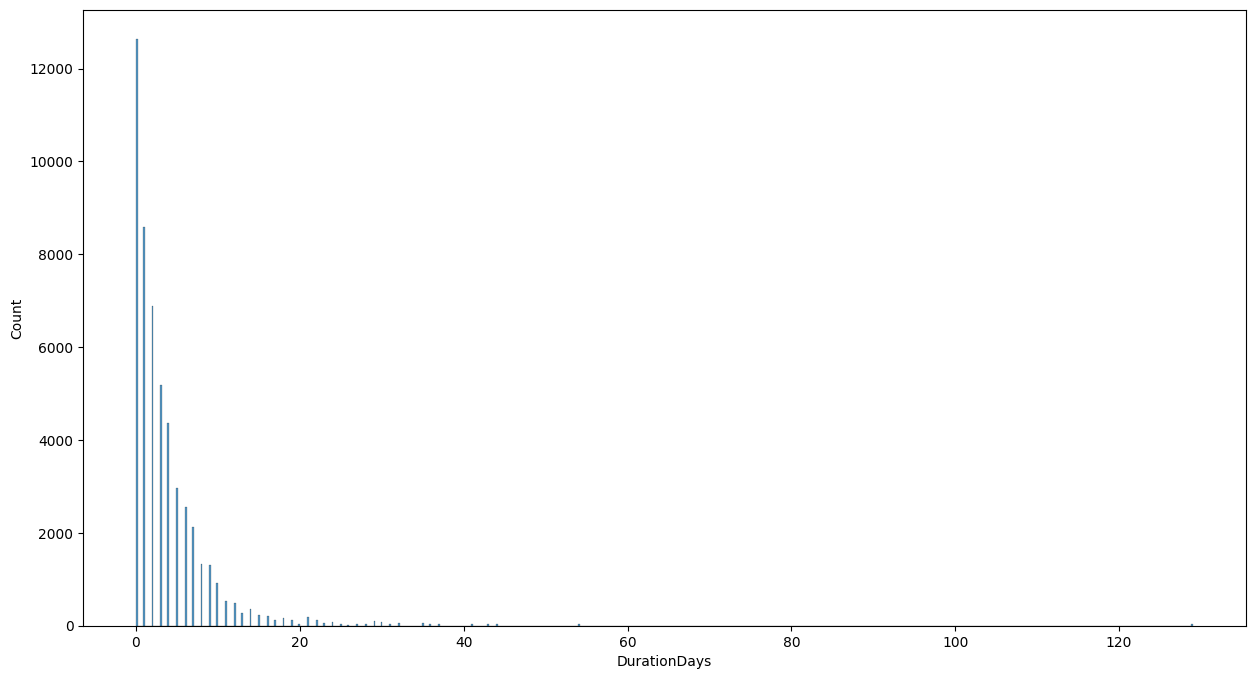

In [14]:
plt.figure(figsize=(15,8))
sns.histplot(data=HealthCareDataSet, x="DurationDays")

<Figure size 1500x800 with 0 Axes>

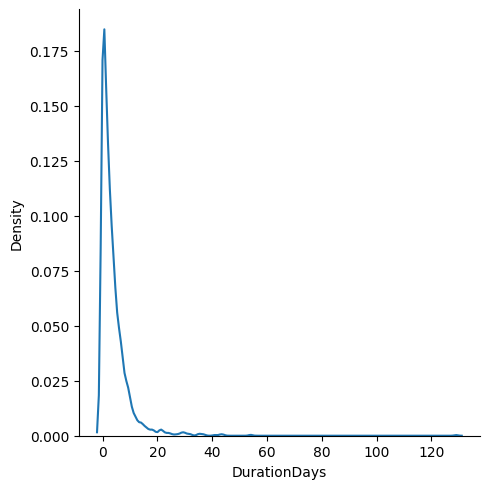

In [15]:
plt.figure(figsize=(15,8))
sns.displot(data=HealthCareDataSet, x="DurationDays",kind='kde')

## 5. Visualization of continuous variables (ScatterPlots)

### What is the relationship between TotalCosts and duration of the medical event ?

In [16]:
## We compute the TotalCost involved in each medical event
HealthCareDataSetGrouped=HealthCareDataSet.groupby(['MedicalClaim','StartDate','EndDate'])['TotalExpenses'].sum().reset_index()
HealthCareDataSetGrouped

,MedicalClaim,StartDate,EndDate,TotalExpenses
0,0012a8eb3c2be5f5,2020-11-18,2020-11-18,4668.692
1,002fd7d73d8060f1,2020-07-17,2020-07-23,53501.259
2,003886fc8ec986d4,2020-02-26,2020-02-26,17115.714
3,004fa1cd47f65193,2020-09-06,2020-09-06,3672.361
4,005edafb00d0f6eb,2020-03-06,2020-03-06,2548.700
...,...,...,...,...
3356,ffbb520f6fd3b2c9,2020-03-04,2020-03-04,16743.412
3357,ffbd17c54f798c21,2020-07-18,2020-07-27,137173.701
3358,ffe2c14dfe865b6d,2020-03-10,2020-03-14,82255.586
3359,ffe9f5181940e236,2020-09-14,2020-09-16,32393.578


In [17]:
## We compute the duration of each medical event
HealthCareDataSetGrouped['Duration']=HealthCareDataSetGrouped['EndDate']-HealthCareDataSetGrouped['StartDate']

In [18]:
# We compute the days
HealthCareDataSetGrouped['DurationDays']=HealthCareDataSetGrouped['Duration'].dt.days

<Axes: xlabel='DurationDays', ylabel='TotalExpenses'>

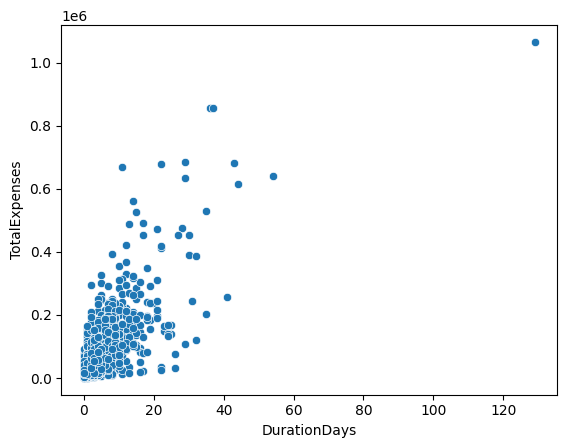

In [19]:


sns.scatterplot(data=HealthCareDataSetGrouped, x="DurationDays", y="TotalExpenses")

<Axes: xlabel='DurationDays', ylabel='TotalExpenses'>

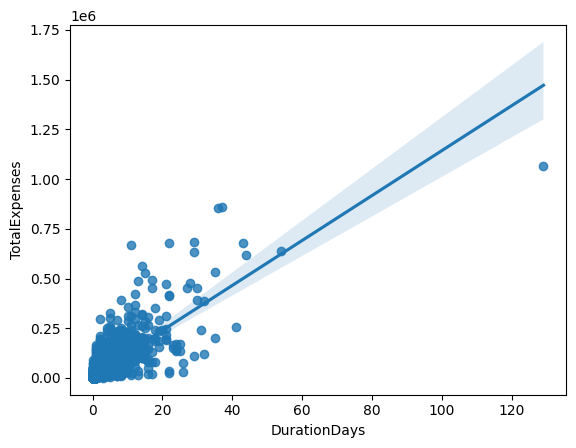

In [20]:
sns.regplot(data=HealthCareDataSetGrouped, x="DurationDays", y="TotalExpenses")

### Does the previous relationship depend on counties ?

In [21]:
## We compute the TotalCost involved in each medical event
HealthCareDataSetGrouped2=HealthCareDataSet.groupby(['MedicalClaim','County','StartDate','EndDate'])['TotalExpenses'].sum().reset_index()
HealthCareDataSetGrouped2

,MedicalClaim,County,StartDate,EndDate,TotalExpenses
0,0012a8eb3c2be5f5,fd218584,2020-11-18,2020-11-18,4668.692
1,002fd7d73d8060f1,b021dd12,2020-07-17,2020-07-23,53501.259
2,003886fc8ec986d4,fd218584,2020-02-26,2020-02-26,17115.714
3,004fa1cd47f65193,02af982d,2020-09-06,2020-09-06,3672.361
4,005edafb00d0f6eb,425a37b2,2020-03-06,2020-03-06,2548.700
...,...,...,...,...,...
3356,ffbb520f6fd3b2c9,425a37b2,2020-03-04,2020-03-04,16743.412
3357,ffbd17c54f798c21,02af982d,2020-07-18,2020-07-27,137173.701
3358,ffe2c14dfe865b6d,b021dd12,2020-03-10,2020-03-14,82255.586
3359,ffe9f5181940e236,02af982d,2020-09-14,2020-09-16,32393.578


In [22]:
## We compute the duration of each medical event
HealthCareDataSetGrouped2['Duration']=HealthCareDataSetGrouped2['EndDate']-HealthCareDataSetGrouped2['StartDate']
# We compute the days
HealthCareDataSetGrouped2['DurationDays']=HealthCareDataSetGrouped2['Duration'].dt.days

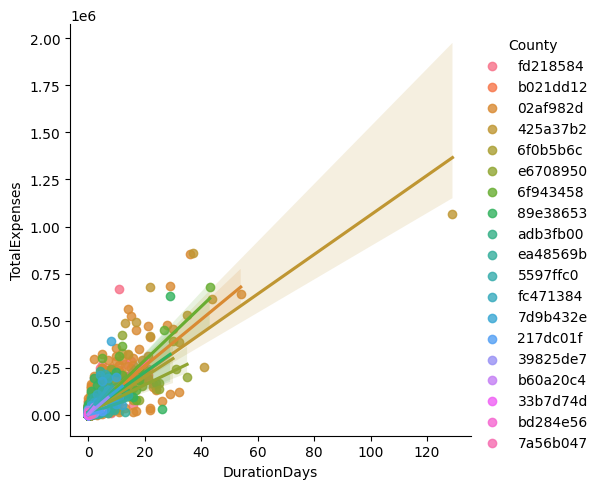

In [23]:
sns.lmplot(data=HealthCareDataSetGrouped2, x="DurationDays", y="TotalExpenses",hue='County')

## 6. Visualization of discrete variables (BarPlots)

### Total Cost accross counties

<Axes: xlabel='County', ylabel='TotalExpenses'>

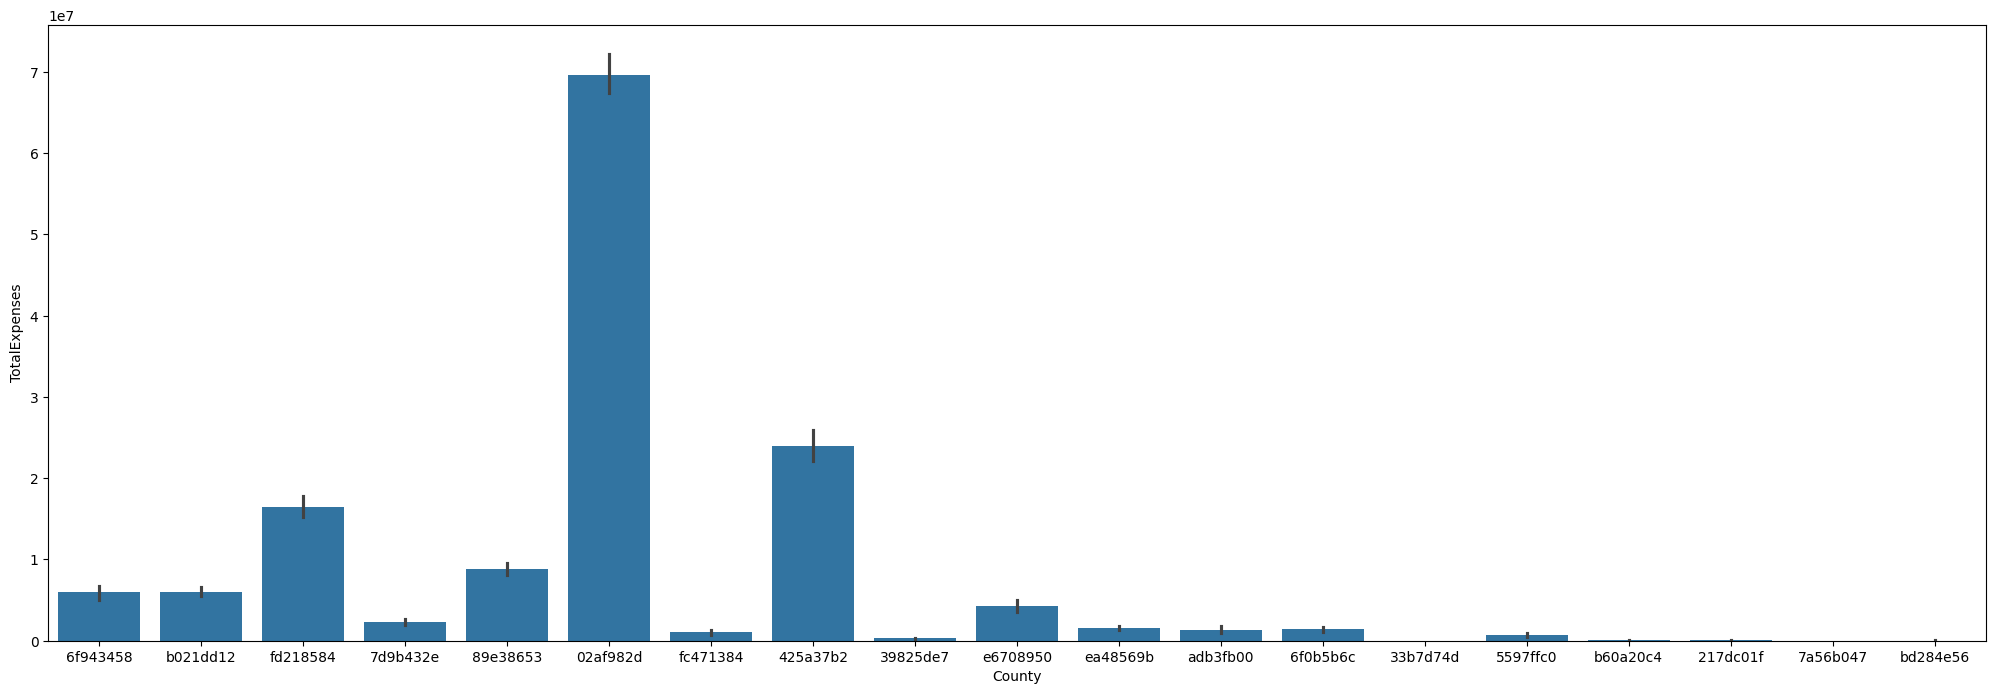

In [24]:
plt.figure(figsize=(25,8))
sns.barplot(HealthCareDataSet, x="County", y="TotalExpenses",estimator='sum')


### Total Cost accross Hospital

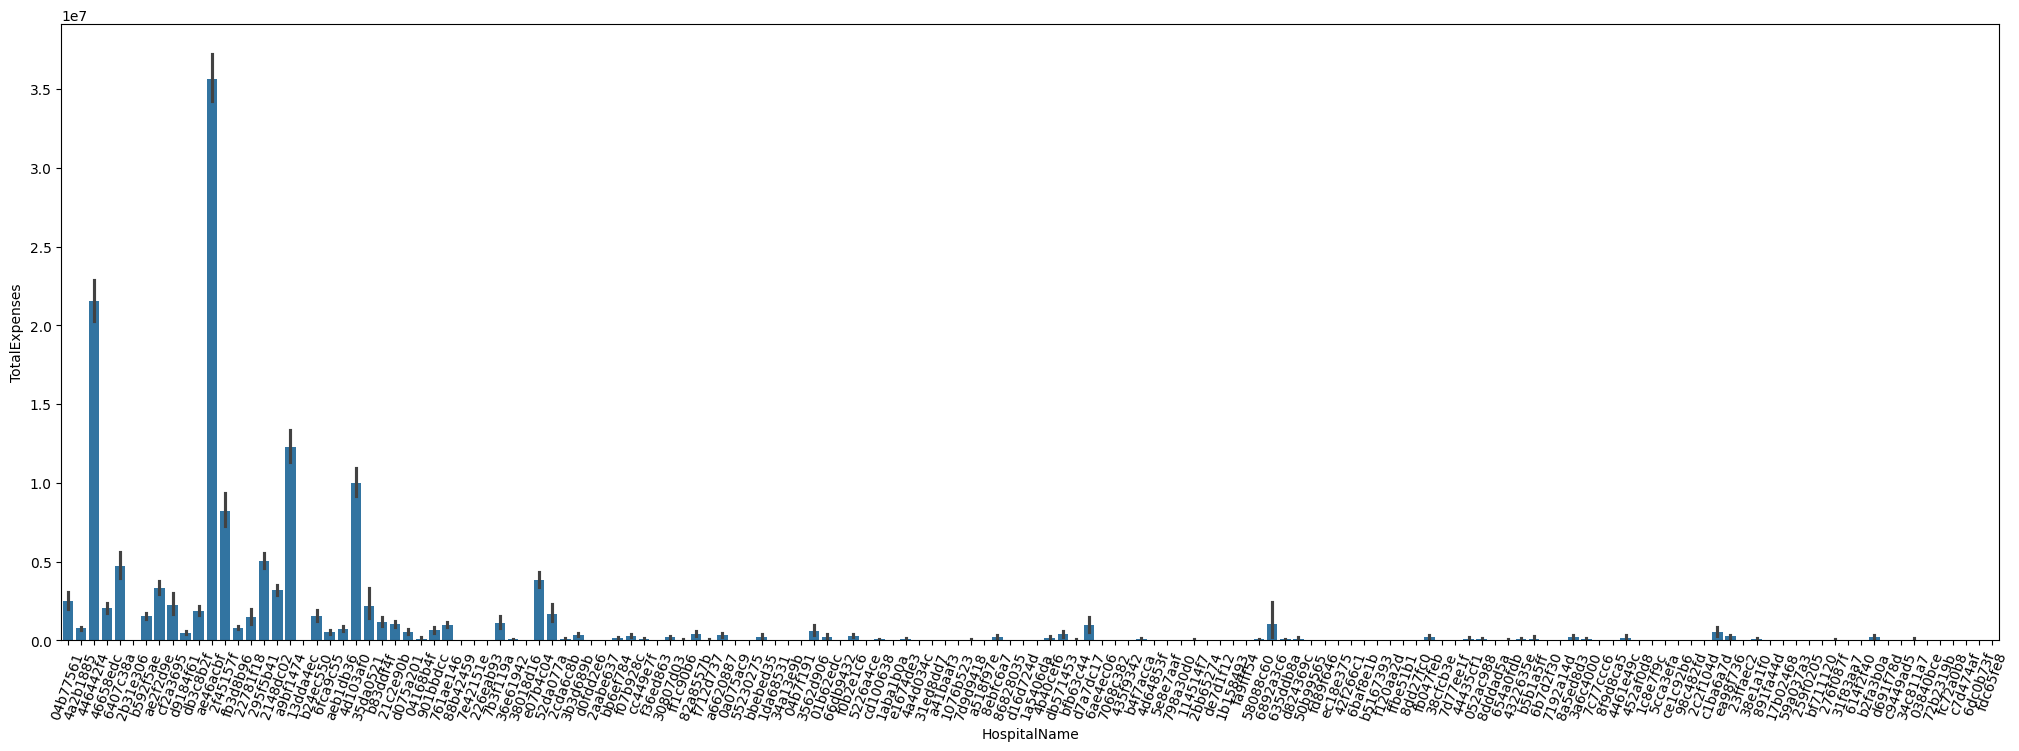

In [25]:
plt.figure(figsize=(25,8))
sns.barplot(HealthCareDataSet, x="HospitalName", y="TotalExpenses",estimator='sum');
plt.xticks(rotation=70);


## 7. Visualization of discrete variables (BoxPlots)

### Distribution of TotalCosts by County

<Axes: xlabel='County', ylabel='TotalExpenses'>

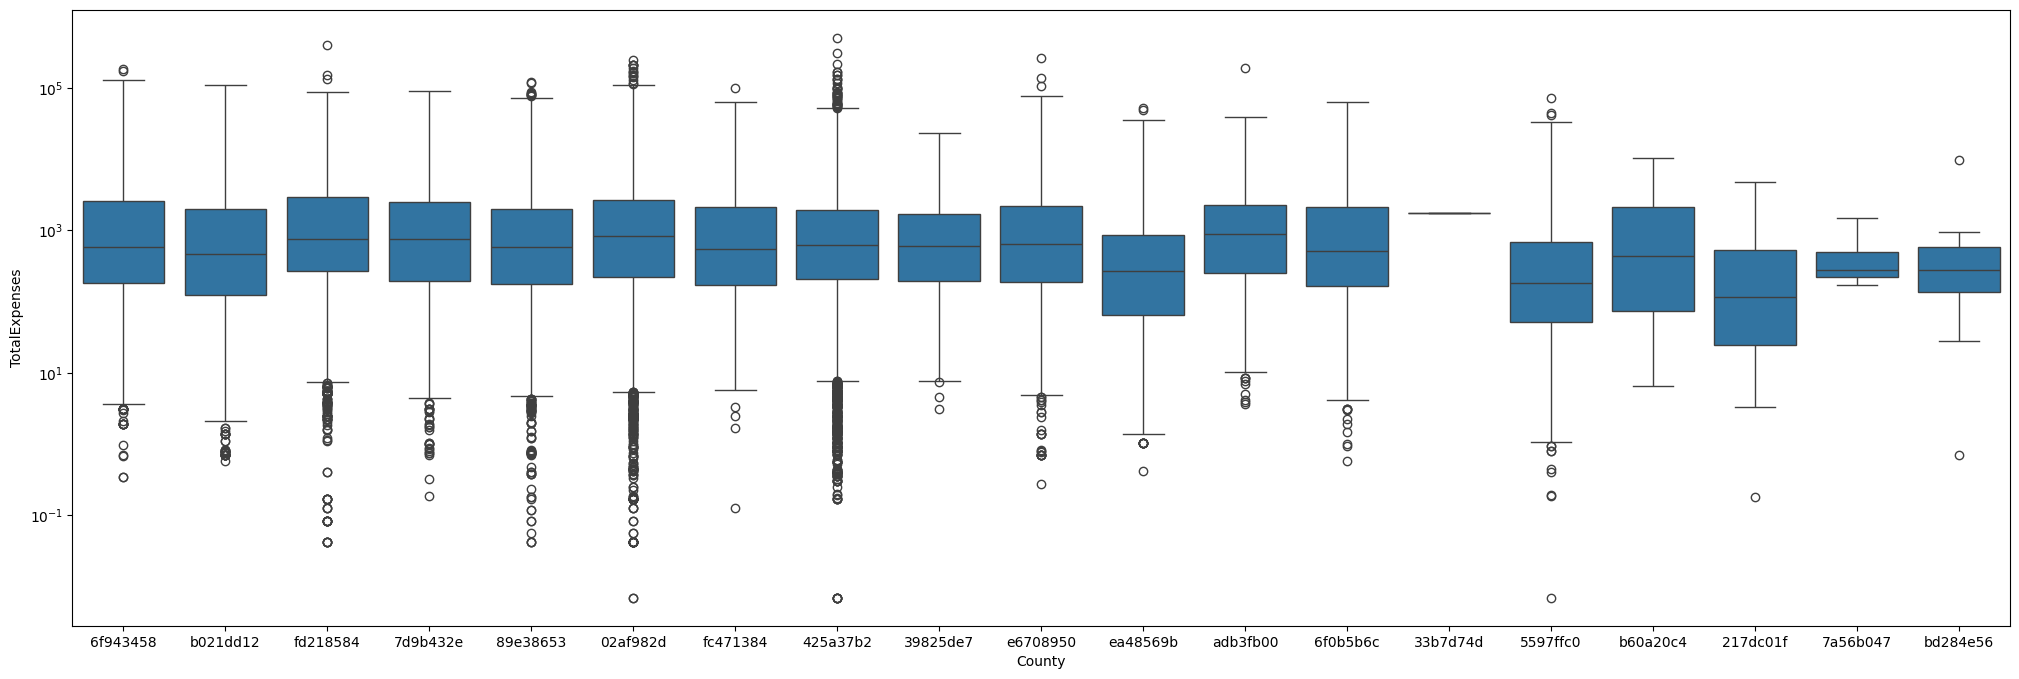

In [26]:
plt.figure(figsize=(25,8))
sns.boxplot(HealthCareDataSet, x="County", y="TotalExpenses",log_scale=10)

### Does TotalCost depend on the type of medical service ?

<Axes: xlabel='County', ylabel='TotalExpenses'>

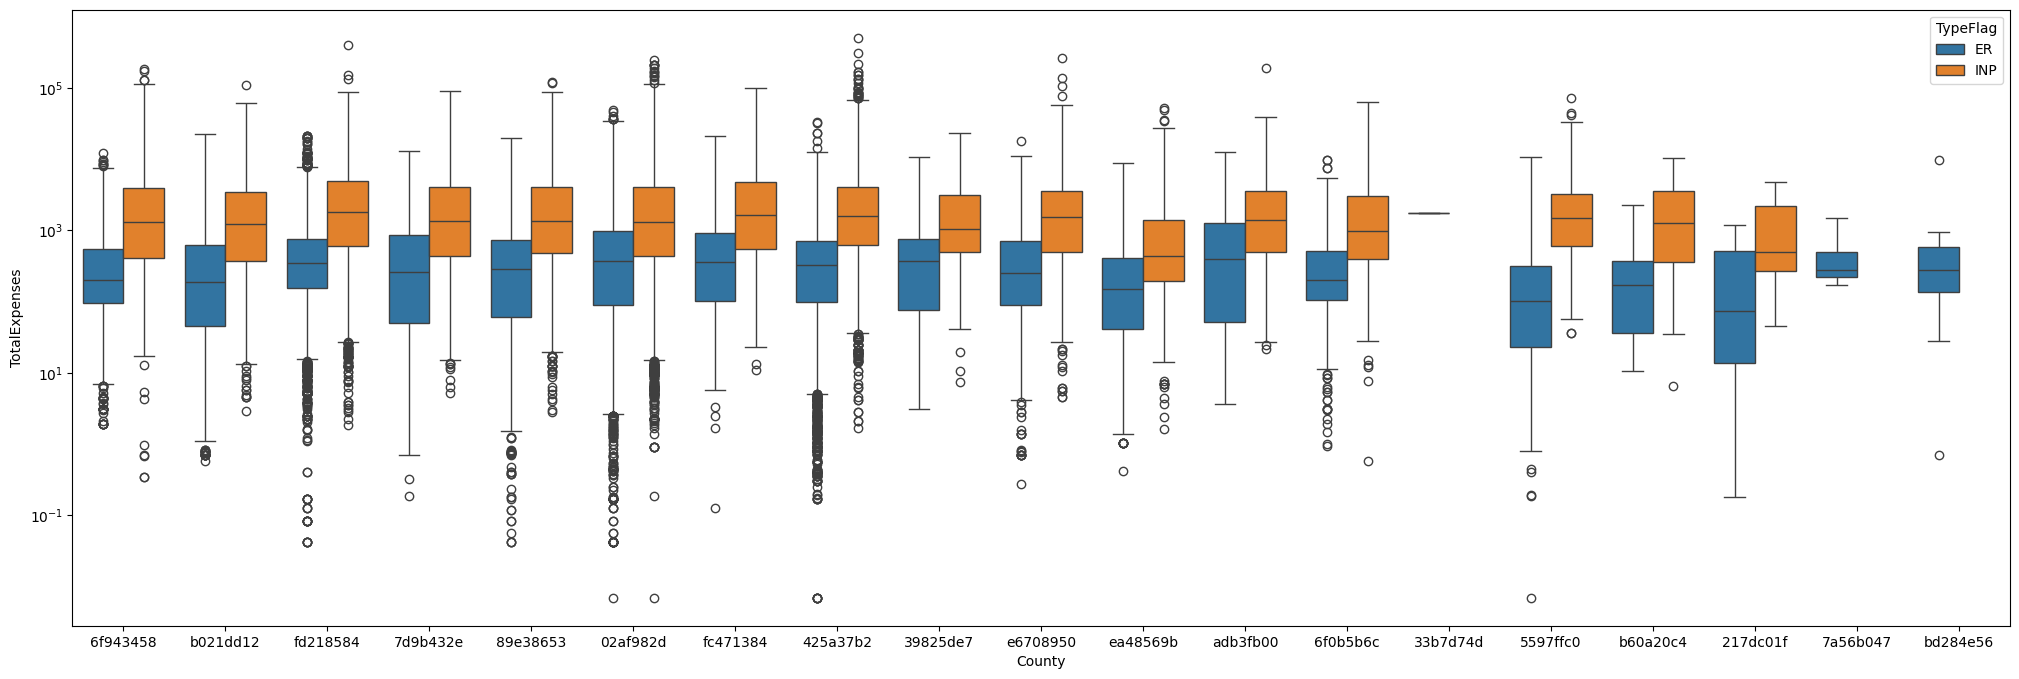

In [27]:
plt.figure(figsize=(25,8))
sns.boxplot(HealthCareDataSet, x="County", y="TotalExpenses",hue='TypeFlag',log_scale=10)

## 9. Challenge Yourself !!

### Develop a BarPlot Visualization of the Top10 most expensive Principal Diagnosis

### Develop a BoxPlot Visualization of the Top10 most expensive Principal Diagnosis